In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/ARTIFACTS/ARTIFACTS.zip"

Streaming output truncated to the last 5000 lines.
  inflating: ARTIFACTS/FAKE/img008001.jpg  
  inflating: ARTIFACTS/FAKE/img008002.jpg  
  inflating: ARTIFACTS/FAKE/img008003.jpg  
  inflating: ARTIFACTS/FAKE/img008004.jpg  
  inflating: ARTIFACTS/FAKE/img008005.jpg  
  inflating: ARTIFACTS/FAKE/img008006.jpg  
  inflating: ARTIFACTS/FAKE/img008007.jpg  
  inflating: ARTIFACTS/FAKE/img008008.jpg  
  inflating: ARTIFACTS/FAKE/img008009.jpg  
  inflating: ARTIFACTS/FAKE/img008010.jpg  
  inflating: ARTIFACTS/FAKE/img008011.jpg  
  inflating: ARTIFACTS/FAKE/img008012.jpg  
  inflating: ARTIFACTS/FAKE/img008013.jpg  
  inflating: ARTIFACTS/FAKE/img008014.jpg  
  inflating: ARTIFACTS/FAKE/img008015.jpg  
  inflating: ARTIFACTS/FAKE/img008016.jpg  
  inflating: ARTIFACTS/FAKE/img008017.jpg  
  inflating: ARTIFACTS/FAKE/img008018.jpg  
  inflating: ARTIFACTS/FAKE/img008019.jpg  
  inflating: ARTIFACTS/FAKE/img008020.jpg  
  inflating: ARTIFACTS/FAKE/img008021.jpg  
  inflating: ARTIFACTS/FA

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras.utils import load_img
import numpy as np
import random
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D, GlobalAveragePooling2D, Dense, Flatten, Dropout,MaxPool2D
from tensorflow.keras.layers import Input, Add, BatchNormalization, Resizing, Rescaling, RandomFlip, RandomRotation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras import Model, layers
from sklearn.preprocessing import LabelEncoder
import cv2
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input

In [ ]:
PATH = "/content/ARTIFACTS/"
class_labels=[]
datasets = []
for class_label in os.listdir(PATH):
  class_labels.append(class_label)
  for img in os.listdir(PATH + class_label):
    img_path = PATH + class_label + '/' + img
    img = cv2.imread(img_path)
    img_arr = np.array(img)
    datasets.append((img_arr,class_label))

In [ ]:
X_dataset = []
Y_dataset = []

for image, label in datasets:
  X_dataset.append(image)
  Y_dataset.append(label)

X_dataset = np.array(X_dataset)
Y_dataset = np.array(Y_dataset)

In [ ]:
le = LabelEncoder()
Y_dataset = le.fit_transform(Y_dataset)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
callback = EarlyStopping(monitor='val_loss',patience=3)

Inception v3

In [ ]:
X_dataset = preprocess_input(X_dataset)

In [ ]:
model = InceptionV3(input_shape=(200, 200, 3), weights=None, include_top=False)
x = layers.Dropout(0.5)(model.output)
x = layers.Flatten()(x)
model = Model(model.input,x)

In [ ]:
features = model.predict(X_dataset)

188/188 [==============================] - 18s 47ms/step


In [ ]:
features.shape

(6000, 32768)

In [ ]:
X = features

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
X

array([[-0.7340176 ,  0.        , -0.17218092, ..., -0.37231848,
         0.        , -1.4237406 ],
       [-0.98597175,  0.        , -0.0107122 , ..., -0.37231848,
         0.        , -0.6365121 ],
       [ 2.2404776 ,  0.        ,  2.0070972 , ...,  1.8144668 ,
         0.        , -1.510651  ],
       ...,
       [-0.86325955,  0.        , -0.7384615 , ..., -0.37231848,
         0.        ,  1.1607041 ],
       [-0.23325558,  0.        , -0.477791  , ..., -0.37231848,
         0.        , -0.8050322 ],
       [-0.95071137,  0.        , -0.19441463, ..., -0.37231848,
         0.        ,  0.5508438 ]], dtype=float32)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=1000)
pca_features = pca.fit_transform(X)

In [ ]:
pca_features.shape

(6000, 1000)

In [ ]:
explained_variance = pca.explained_variance_ratio_

In [ ]:
import matplotlib.pyplot as plt

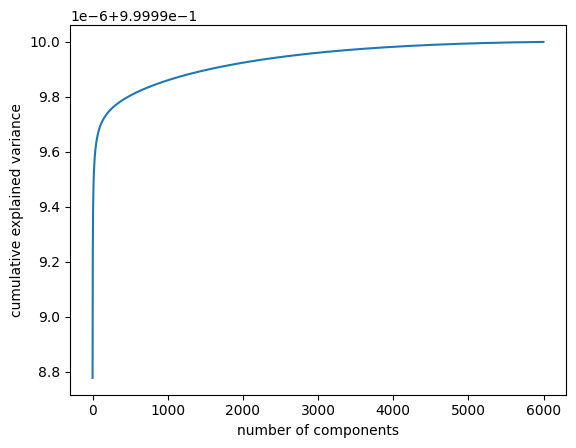

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
X = pca_features
Y = Y_dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42,stratify=Y)

In [ ]:
from sklearn.svm import SVC
clf = SVC(kernel='rbf')

In [ ]:
clf.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 65.75%


In [ ]:
from xgboost import XGBClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42,stratify=Y)

In [ ]:
model = XGBClassifier(objective='binary:logistic',learning_rate=0.001,n_estimators=100,max_depth=100)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=100, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 99.92%


In [ ]:
print(model.score(X_train,y_train))

0.9997916666666666


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

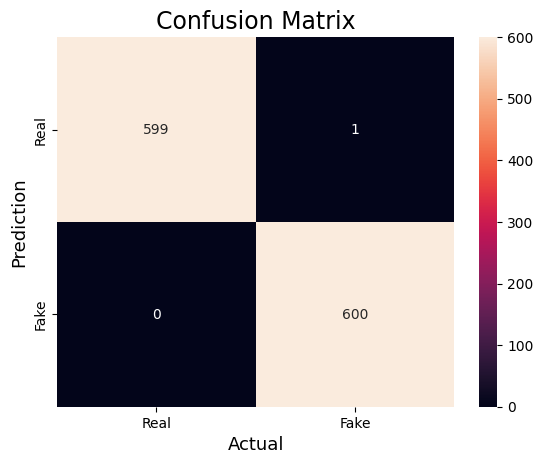

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Real','Fake'],
            yticklabels=['Real','Fake'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
score_lr=cross_val_score(model, X, Y,cv=10)
print(score_lr)
print("Avg :",np.average(score_lr))

[0.5 1.  1.  1.  1.  1.  1.  1.  1.  1. ]
Avg : 0.95


In [ ]:
model.score()

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
clf = RandomForestClassifier(n_estimators = 100)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.75%


In [ ]:
from sklearn.model_selection import cross_val_score
score_lr=cross_val_score(clf, X, Y,cv=10)
print(score_lr)
print("Avg :",np.average(score_lr))

[0.69833333 0.79166667 0.82166667 0.76666667 0.825      0.765
 0.78833333 0.74833333 0.765      0.71833333]
Avg : 0.7688333333333334


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

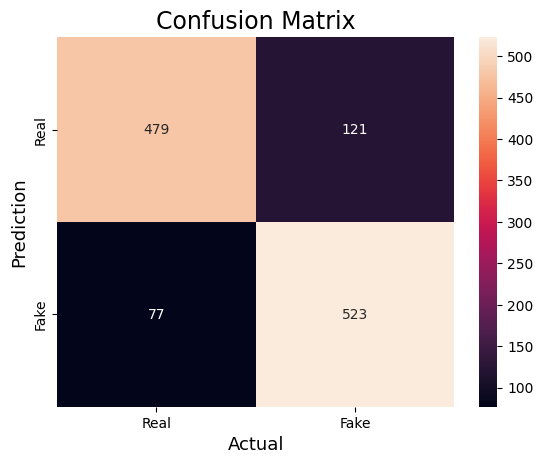

In [ ]:
import seaborn as sns
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Real','Fake'],
            yticklabels=['Real','Fake'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()

In [ ]:
from tensorflow.keras.applications import VGG19

In [ ]:
X_dataset = tf.keras.applications.vgg19.preprocess_input(X_dataset)

In [ ]:
model = VGG19(include_top=False,weights=None,input_shape=(200,200,3))
x = layers.Dropout(0.25)(model.output)
x = layers.Flatten()(x)
model = Model(model.input,x)

In [ ]:
features = model.predict(X_dataset)

188/188 [==============================] - 37s 129ms/step


In [ ]:
features.shape

(6000, 18432)

In [ ]:
X = features

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/Features Artifacts/FeaturesOriginal.csv")

In [ ]:
X = df.drop("Target",axis=1)
Y = df["Target"]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(3500)
pca_features = pca.fit_transform(X)

In [ ]:
explained_variance = pca.explained_variance_ratio_

In [ ]:
import matplotlib.pyplot as plt

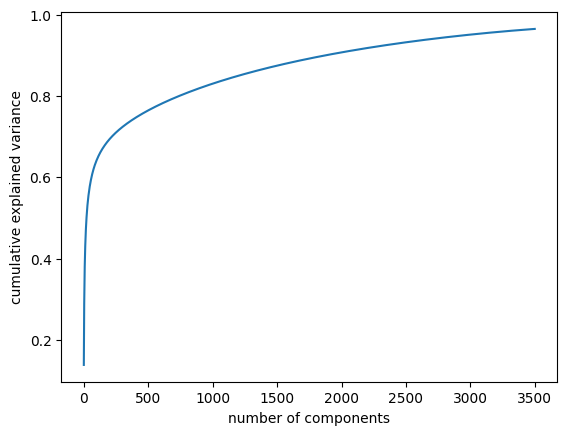

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [ ]:
X = pca_features

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42,stratify=Y)

In [ ]:
from sklearn.svm import SVC
clf = SVC(C=0.1,kernel="linear",gamma="scale")

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
param_grid = {'C': [0.1, 1, 10, 100],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'gamma':['scale', 'auto'],
              'kernel': ['linear']}
grid = GridSearchCV(clf, param_grid, refit = True, verbose = 3,n_jobs=-1)

grid.fit(X_train, y_train)
print(grid.best_params_)

grid_predictions = grid.predict(X_test)
print(classification_report(y_test, grid_predictions))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
              precision    recall  f1-score   support

           0       0.90      0.91      0.90       600
           1       0.91      0.90      0.90       600

    accuracy                           0.90      1200
   macro avg       0.90      0.90      0.90      1200
weighted avg       0.90      0.90      0.90      1200



In [ ]:
clf.fit(X_train, y_train)
# 90.42

SVC(C=0.1, kernel='linear')

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 90.33%


In [ ]:
from sklearn.model_selection import cross_val_score
score_lr=cross_val_score(clf, X, Y,cv=10)
print(score_lr)
print("Avg :",np.average(score_lr))

[0.81166667 0.88166667 0.92       0.93333333 0.96       0.97166667
 0.935      0.895      0.88833333 0.79833333]
Avg : 0.8995000000000001


In [ ]:
test_score = clf.score(X_test, y_test)

In [ ]:
print(test_score)

0.9033333333333333


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
X.shape

(6000, 3500)

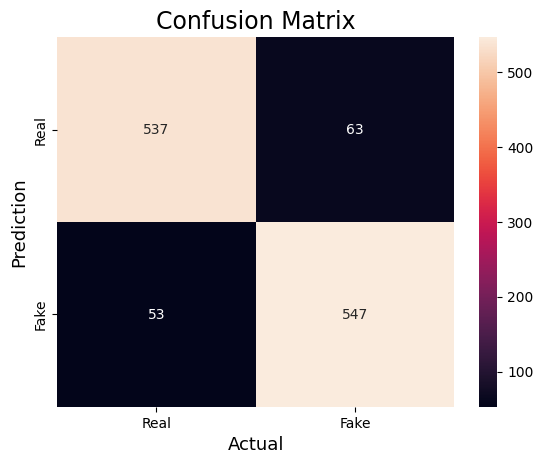

In [ ]:
import seaborn as sns
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Real','Fake'],
            yticklabels=['Real','Fake'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()